In [4]:
# Step 1: Load and Inspect the Dataset

import pandas as pd

# Load the dataset
# Replace 'car.data' with your actual file path
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('car.data', names=column_names)

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Display basic info about the dataset
print("\nDataset info:")
print(df.info())

# Display statistical summary (for categorical, it shows counts)
print("\nDataset description:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check class distribution
print("\nTarget class distribution:")
print(df['class'].value_counts())


First 5 rows of the dataset:
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None

Dataset description:
       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique

In [5]:
from sklearn.preprocessing import OneHotEncoder

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

# One-Hot Encode the categorical features
encoder = OneHotEncoder(sparse_output=False)  # updated parameter
X_encoded = encoder.fit_transform(X)

# Convert back to DataFrame for easier handling
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(X.columns))

# Encode the target variable using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # unacc->0, acc->1, good->2, vgood->3

# Inspect encoded features
print("First 5 rows after encoding:")
print(X_encoded.head())

print("\nEncoded target values:")
print(y_encoded[:10])


First 5 rows after encoding:
   buying_high  buying_low  buying_med  buying_vhigh  maint_high  maint_low  \
0          0.0         0.0         0.0           1.0         0.0        0.0   
1          0.0         0.0         0.0           1.0         0.0        0.0   
2          0.0         0.0         0.0           1.0         0.0        0.0   
3          0.0         0.0         0.0           1.0         0.0        0.0   
4          0.0         0.0         0.0           1.0         0.0        0.0   

   maint_med  maint_vhigh  doors_2  doors_3  ...  doors_5more  persons_2  \
0        0.0          1.0      1.0      0.0  ...          0.0        1.0   
1        0.0          1.0      1.0      0.0  ...          0.0        1.0   
2        0.0          1.0      1.0      0.0  ...          0.0        1.0   
3        0.0          1.0      1.0      0.0  ...          0.0        1.0   
4        0.0          1.0      1.0      0.0  ...          0.0        1.0   

   persons_4  persons_more  lug_boot_bi

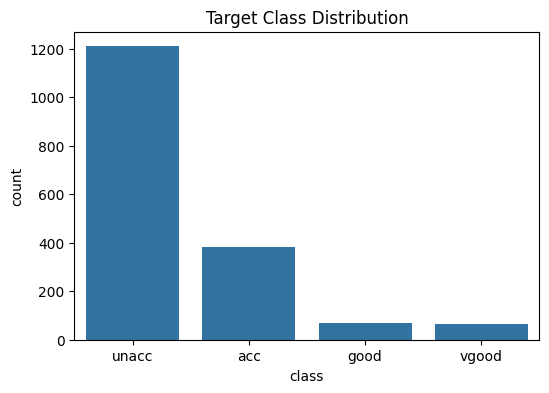

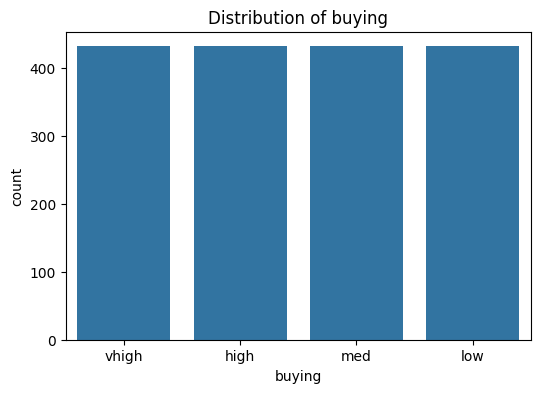

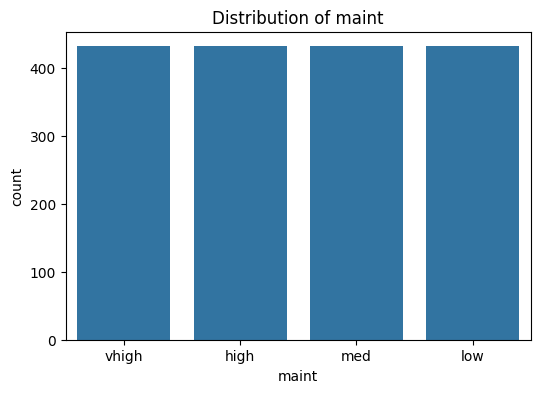

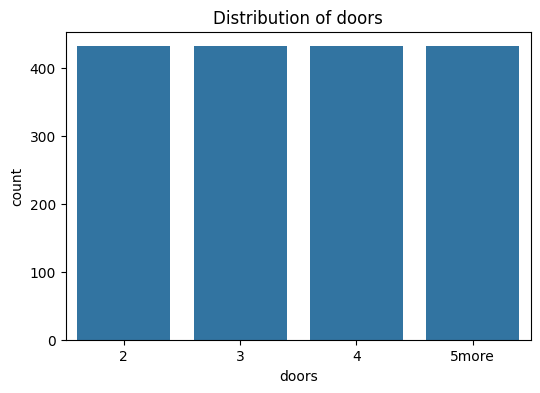

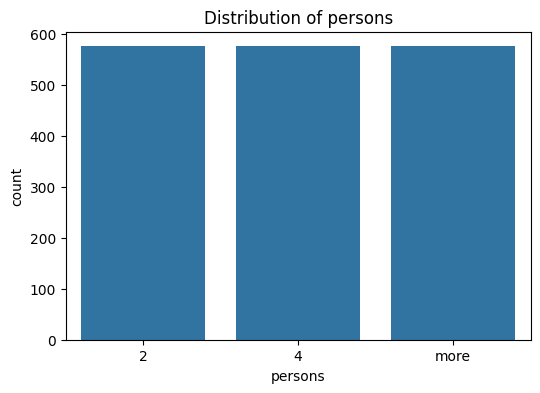

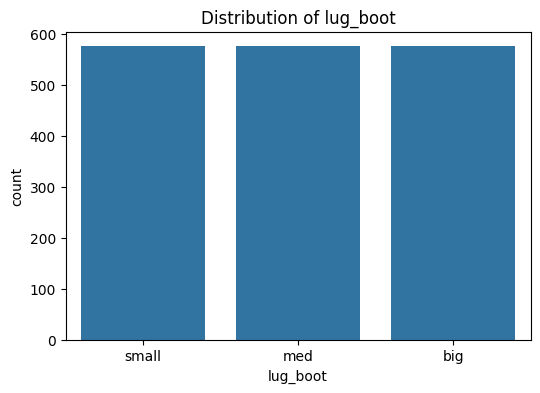

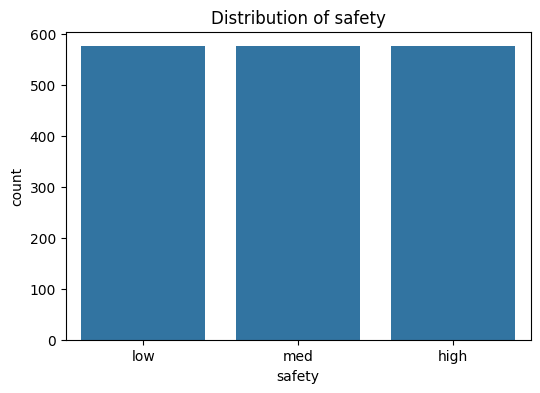

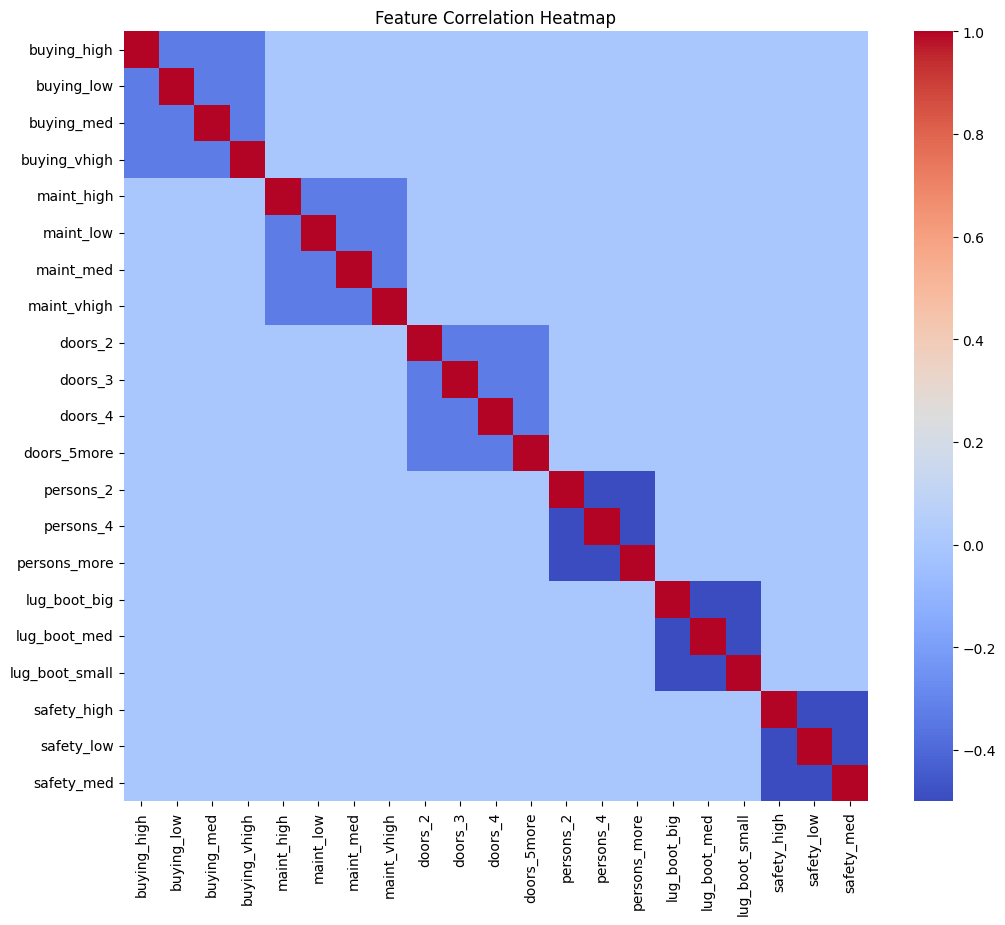


Features most correlated with target:
target            1.000000
persons_2         0.360750
safety_low        0.360750
buying_vhigh      0.074782
maint_vhigh       0.074782
doors_2           0.039680
lug_boot_small    0.036916
buying_low        0.012209
maint_high       -0.006105
doors_3          -0.012209
doors_5more      -0.013736
doors_4          -0.013736
lug_boot_med     -0.016355
maint_low        -0.016788
lug_boot_big     -0.020561
buying_high      -0.035102
maint_med        -0.051890
buying_med       -0.051890
persons_more     -0.157945
safety_high      -0.162150
safety_med       -0.198599
persons_4        -0.202805
Name: target, dtype: float64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Target class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, order=df['class'].value_counts().index)
plt.title("Target Class Distribution")
plt.show()

# 2. Feature value counts
for col in df.columns[:-1]:  # exclude target
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

# 3. Correlation heatmap (for encoded features)
plt.figure(figsize=(12,10))
sns.heatmap(X_encoded.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# 4. Correlation with target (optional)
# We can create a temporary DataFrame with target for association
df_encoded = X_encoded.copy()
df_encoded['target'] = y_encoded
corr_with_target = df_encoded.corr()['target'].sort_values(ascending=False)
print("\nFeatures most correlated with target:")
print(corr_with_target)


Top 10 important features:
           feature  importance
19      safety_low    0.140768
12       persons_2    0.132162
18     safety_high    0.074867
20      safety_med    0.060127
13       persons_4    0.056300
7      maint_vhigh    0.051058
17  lug_boot_small    0.047609
1       buying_low    0.046298
3     buying_vhigh    0.045098
14    persons_more    0.041354


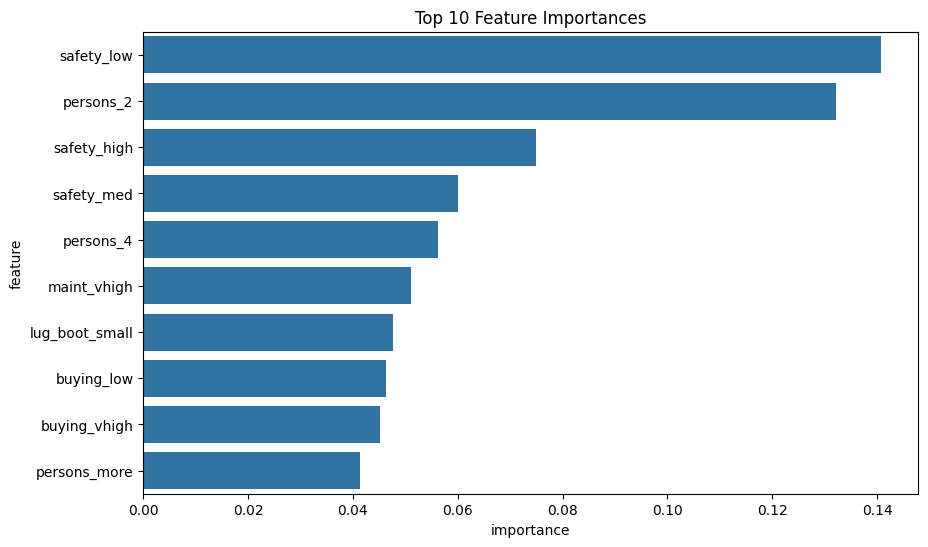

In [21]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train a temporary RandomForest to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_encoded, y_encoded)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_encoded.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display top 10 important features
print("Top 10 important features:")
print(feature_importance_df.head(10))

# Optional: plot top features
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title("Top 10 Feature Importances")
plt.show()


In [7]:
top_features = ['safety', 'persons', 'maint', 'lug_boot', 'buying']
X_selected = df[top_features]

# Now we need to one-hot encode these 5 features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
X_selected_encoded = encoder.fit_transform(X_selected)
X_selected_encoded = pd.DataFrame(X_selected_encoded, columns=encoder.get_feature_names_out(top_features))

print("Shape of dataset with top 5 features (one-hot encoded):", X_selected_encoded.shape)


Shape of dataset with top 5 features (one-hot encoded): (1728, 17)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# --- Split data for all features ---
X_train_all, X_test_all, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# --- Split data for top 5 features ---
X_train_sel, X_test_sel, _, _ = train_test_split(X_selected_encoded, y_encoded, test_size=0.2, random_state=42)

# --- Define classifiers ---
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

# --- Function to train and evaluate ---
def evaluate_models(X_train, X_test, y_train, y_test, feature_set_name):
    results = {}
    print(f"\n--- Evaluating models on {feature_set_name} ---")
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        print(f"{name}: Accuracy = {acc:.4f}")
    return results

# --- Evaluate on all features ---
results_all = evaluate_models(X_train_all, X_test_all, y_train, y_test, "All Features")

# --- Evaluate on top 5 influential features ---
results_selected = evaluate_models(X_train_sel, X_test_sel, y_train, y_test, "Top 5 Features")

# --- Compare results ---
import pandas as pd
comparison = pd.DataFrame({
    "All Features": results_all,
    "Top 5 Features": results_selected
}).sort_values(by="All Features", ascending=False)

print("\nComparison of Model Accuracy:")
print(comparison)



--- Evaluating models on All Features ---
Logistic Regression: Accuracy = 0.9162
Decision Tree: Accuracy = 0.9566
Random Forest: Accuracy = 0.9538
SVM: Accuracy = 0.9682
KNN: Accuracy = 0.8468

--- Evaluating models on Top 5 Features ---
Logistic Regression: Accuracy = 0.8988
Decision Tree: Accuracy = 0.9422
Random Forest: Accuracy = 0.9306
SVM: Accuracy = 0.9624
KNN: Accuracy = 0.9162

Comparison of Model Accuracy:
                     All Features  Top 5 Features
SVM                      0.968208        0.962428
Decision Tree            0.956647        0.942197
Random Forest            0.953757        0.930636
Logistic Regression      0.916185        0.898844
KNN                      0.846821        0.916185


In [9]:
import pickle

# Best model (SVM trained on top 5 features)
best_model = SVC(random_state=42, probability=True)  # probability=True if you want probabilities in GUI
best_model.fit(X_selected_encoded, y_encoded)

# Save the model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save the encoder for the top 5 features
encoder_top5 = encoder  # This is the OneHotEncoder we used for X_selected_encoded
with open('encoder_top5.pkl', 'wb') as f:
    pickle.dump(encoder_top5, f)

# Save the label encoder for the target variable
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print("✅ Best model, feature encoder, and label encoder saved successfully!")


✅ Best model, feature encoder, and label encoder saved successfully!


import tkinter as tk
from tkinter import ttk, messagebox
import pickle
import numpy as np
import pandas as pd

# --- Load saved model and encoders ---
with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('encoder_top5.pkl', 'rb') as f:
    encoder = pickle.load(f)

with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# --- Define feature options ---
feature_options = {
    'safety': ['low', 'med', 'high'],
    'persons': ['2', '4', 'more'],
    'maint': ['low', 'med', 'high', 'vhigh'],
    'lug_boot': ['small', 'med', 'big'],
    'buying': ['low', 'med', 'high', 'vhigh']
}

# --- Create main window ---
root = tk.Tk()
root.title("Car Evaluation Prediction")
root.geometry("400x450")
root.resizable(False, False)

# --- Title Label ---
title_label = tk.Label(root, text="Car Evaluation Classifier", font=("Helvetica", 16, "bold"))
title_label.pack(pady=10)

# --- Input frames ---
input_vars = {}
for feature, options in feature_options.items():
    frame = tk.Frame(root)
    frame.pack(pady=5)
    label = tk.Label(frame, text=f"{feature.capitalize()}: ", width=15, anchor='w')
    label.pack(side=tk.LEFT)
    var = tk.StringVar()
    combo = ttk.Combobox(frame, textvariable=var, values=options, state='readonly')
    combo.current(0)
    combo.pack(side=tk.LEFT)
    input_vars[feature] = var

# --- Prediction label ---
result_label = tk.Label(root, text="", font=("Helvetica", 14, "bold"))
result_label.pack(pady=20)

# --- Predict function ---
def predict():
    try:
        # Get input values
        input_data = {feature: var.get() for feature, var in input_vars.items()}
        input_df = pd.DataFrame([input_data])

        # Encode input
        input_encoded = encoder.transform(input_df)

        # Predict
        prediction_encoded = model.predict(input_encoded)
        prediction_label = label_encoder.inverse_transform(prediction_encoded)[0]

        # Display result with color
        color_map = {'unacc':'red', 'acc':'orange', 'good':'green', 'vgood':'blue'}
        result_label.config(text=f"Prediction: {prediction_label.upper()}", fg=color_map.get(prediction_label, 'black'))

    except Exception as e:
        messagebox.showerror("Error", str(e))

# --- Predict button ---
predict_button = tk.Button(root, text="Predict", command=predict, bg="blue", fg="white", font=("Helvetica", 12, "bold"))
predict_button.pack(pady=10)

# --- Run the GUI ---
root.mainloop()


In [11]:
import tkinter as tk
from tkinter import ttk, messagebox
import pickle
import numpy as np
import pandas as pd

# --- Load saved model and encoders ---
with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('encoder_top5.pkl', 'rb') as f:
    encoder = pickle.load(f)

with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# --- Define feature options ---
feature_options = {
    'safety': ['low', 'med', 'high'],
    'persons': ['2', '4', 'more'],
    'maint': ['low', 'med', 'high', 'vhigh'],
    'lug_boot': ['small', 'med', 'big'],
    'buying': ['low', 'med', 'high', 'vhigh']
}

# --- Create main window ---
root = tk.Tk()
root.title("Car Evaluation Prediction")
root.geometry("400x450")
root.resizable(False, False)

# --- Title Label ---
title_label = tk.Label(root, text="Car Evaluation Classifier", font=("Helvetica", 16, "bold"))
title_label.pack(pady=10)

# --- Input frames ---
input_vars = {}
for feature, options in feature_options.items():
    frame = tk.Frame(root)
    frame.pack(pady=5)
    label = tk.Label(frame, text=f"{feature.capitalize()}: ", width=15, anchor='w')
    label.pack(side=tk.LEFT)
    var = tk.StringVar()
    combo = ttk.Combobox(frame, textvariable=var, values=options, state='readonly')
    combo.current(0)
    combo.pack(side=tk.LEFT)
    input_vars[feature] = var

# --- Prediction label ---
result_label = tk.Label(root, text="", font=("Helvetica", 14, "bold"))
result_label.pack(pady=20)

# --- Predict function ---
def predict():
    try:
        # Get input values
        input_data = {feature: var.get() for feature, var in input_vars.items()}
        input_df = pd.DataFrame([input_data])

        # Encode input
        input_encoded = encoder.transform(input_df)

        # Predict
        prediction_encoded = model.predict(input_encoded)
        prediction_label = label_encoder.inverse_transform(prediction_encoded)[0]

        # Display result with color
        color_map = {'unacc':'red', 'acc':'orange', 'good':'green', 'vgood':'blue'}
        result_label.config(text=f"Prediction: {prediction_label.upper()}", fg=color_map.get(prediction_label, 'black'))

    except Exception as e:
        messagebox.showerror("Error", str(e))

# --- Predict button ---
predict_button = tk.Button(root, text="Predict", command=predict, bg="blue", fg="white", font=("Helvetica", 12, "bold"))
predict_button.pack(pady=10)

# --- Run the GUI ---
root.mainloop()


In [13]:
import tkinter as tk
from tkinter import ttk, messagebox
import pickle
import numpy as np
import pandas as pd
from PIL import Image, ImageTk   # Pillow library for handling images

# --- Load saved model and encoders ---
with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('encoder_top5.pkl', 'rb') as f:
    encoder = pickle.load(f)

with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# --- Define feature options ---
feature_options = {
    'Safety': ['low', 'med', 'high'],
    'Persons': ['2', '4', 'more'],
    'maint': ['low', 'med', 'high', 'vhigh'],
    'lug_boot': ['small', 'med', 'big'],
    'buying': ['low', 'med', 'high', 'vhigh']
}

# --- Create main window ---
root = tk.Tk()
root.title("Car Evaluation Prediction")
root.geometry("550x700")
root.configure(bg="#f4f6f9")
root.resizable(False, False)

# --- Custom style ---
style = ttk.Style()
style.theme_use("clam")
style.configure("TLabel", font=("Segoe UI", 11), background="#f4f6f9")
style.configure("TButton", font=("Segoe UI", 12, "bold"), padding=6)
style.configure("TCombobox", font=("Segoe UI", 11))

# --- Load and display logo ---
try:
    car_logo = Image.open("car_logo.png")  # Add your own logo in same folder
    car_logo = car_logo.resize((100, 100), Image.LANCZOS)
    car_logo_img = ImageTk.PhotoImage(car_logo)
    logo_label = tk.Label(root, image=car_logo_img, bg="#f4f6f9")
    logo_label.pack(pady=10)
except:
    pass  # If logo not found, skip it

# --- Title ---
title_label = tk.Label(root, text="🚗 Car Evaluation Classifier",
                       font=("Segoe UI", 18, "bold"), bg="#f4f6f9", fg="#2c3e50")
title_label.pack(pady=10)

# --- Icons for fields (Unicode emojis for simplicity) ---
feature_icons = {
    'Safety': "🛡",
    'Persons': "👥",
    'maint': "🛠",
    'lug_boot': "🎒",
    'buying': "💰"
}

# --- Input frame (card style) ---
card = tk.Frame(root, bg="white", bd=2, relief="groove", padx=20, pady=20)
card.pack(pady=10, padx=20, fill="both")

input_vars = {}
for feature, options in feature_options.items():
    frame = tk.Frame(card, bg="white")
    frame.pack(pady=8, anchor="w")
    label = tk.Label(frame, text=f"{feature_icons[feature]} {feature}:", 
                     font=("Segoe UI", 11), width=20, anchor='w', bg="white")
    label.pack(side=tk.LEFT, padx=5)
    var = tk.StringVar()
    combo = ttk.Combobox(frame, textvariable=var, values=options, state='readonly', width=12)
    combo.current(0)
    combo.pack(side=tk.LEFT, padx=5)
    input_vars[feature.lower().replace(" ", "_")] = var

# --- Prediction display ---
result_frame = tk.Frame(root, bg="white", bd=2, relief="groove")
result_frame.pack(pady=20, padx=20, fill="x")

result_icon_label = tk.Label(result_frame, bg="white")
result_icon_label.pack(pady=5)

result_label = tk.Label(result_frame, text="Prediction will appear here",
                        font=("Segoe UI", 14, "bold"), bg="white", fg="#7f8c8d")
result_label.pack(pady=15)

# --- Predict function ---
def predict():
    try:
        input_data = {feature: var.get() for feature, var in input_vars.items()}
        input_df = pd.DataFrame([input_data])

        # Encode input
        input_encoded = encoder.transform(input_df)

        # Predict
        prediction_encoded = model.predict(input_encoded)
        prediction_label = label_encoder.inverse_transform(prediction_encoded)[0]

        # Color map for better UI
        color_map = {
            'unacc': ('#e74c3c', "❌"), 
            'acc':   ('#f39c12', "⚠️"), 
            'good':  ('#27ae60', "✅"), 
            'vgood': ('#2980b9', "🌟")
        }

        color, icon = color_map.get(prediction_label, ('#2c3e50', "❓"))
        result_label.config(text=f"Prediction: {prediction_label.upper()}", fg=color)
        result_icon_label.config(text=icon, font=("Segoe UI", 24), fg=color)

    except Exception as e:
        messagebox.showerror("Error", str(e))

# --- Predict button with hover effect ---
def on_enter(e): predict_button.config(bg="#1abc9c")
def on_leave(e): predict_button.config(bg="#16a085")

predict_button = tk.Button(root, text="🔍 Predict", command=predict,
                           bg="#16a085", fg="white", font=("Segoe UI", 12, "bold"), relief="flat")
predict_button.pack(pady=10)

predict_button.bind("<Enter>", on_enter)
predict_button.bind("<Leave>", on_leave)

# --- Run GUI ---
root.mainloop()


C:\Users\MULTI\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\MULTI\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\MULTI\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
